In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [25]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_train[:10]
types=["airplanes","car","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2)) #rezize for better viewing
    plt.imshow(x[index])
    plt.xlabel(types[y[index]])

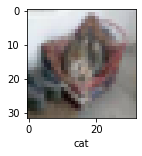

In [17]:
plot_sample(x_train,y_train,1150)

In [18]:
#normalize all pixel values so they range between 0-255
x_train = x_train/255
x_test = x_test/255

In [20]:
## Build the cnn
cnn= models.Sequential([
    ## CNN Part
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    ## cnn one more layer more for better accuracy
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # normal ann dense layer 
    layers.Flatten(),
    layers.Dense(70,activation='relu'), #no. of neurons in 1st hidden layer is 70
    layers.Dense(10,activation='softmax') #in the end there should be 10 neurons as 10 types
    
])

In [22]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [23]:
cnn.fit(x_train,y_train,epochs=11)

Epoch 1/11
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5196 - accuracy: 0.4492
Epoch 2/11
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1890 - accuracy: 0.5802
Epoch 3/11
1563/1563 [==============================] - 38s 25ms/step - loss: 1.0509 - accuracy: 0.6333
Epoch 4/11
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9665 - accuracy: 0.6615
Epoch 5/11
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8997 - accuracy: 0.6846
Epoch 6/11
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8530 - accuracy: 0.7030
Epoch 7/11
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8050 - accuracy: 0.7191
Epoch 8/11
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7676 - accuracy: 0.7316
Epoch 9/11
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7322 - accuracy: 0.7418
Epoch 10/11
1563/1563 [==============================] - 40s 25m

In [24]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9602 - accuracy: 0.6820


[0.9601826071739197, 0.6819999814033508]

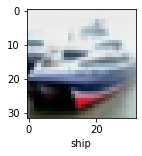

In [26]:
plot_sample(x_test,y_test,1)

In [27]:
y_pred=cnn.predict(x_test)

In [29]:
predicted_types=[np.argmax(element) for element in y_pred]
predicted_types[:10]

[3, 8, 1, 0, 4, 6, 1, 6, 3, 1]

In [30]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [36]:
##checking model
def run_model(value):
    plot_sample(x_test,y_test,value)
    print("Prediction : ", types[predicted_types[value]])

Prediction :  dog


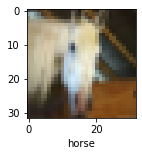

In [40]:
run_model(850)